# Отток клиентов банка. Исследование данных

Привлечение нового клиента для банка обходится гораздо дороже, чем удержание действующего.Банкам необходимо знать, что приводит клиента к решению прекратить сотрудничество.Понимание причин оттока позволяет банкам разрабатывать программы лояльности и кампании по удержанию, чтобы сохранить как можно больше клиентов.

### Описание данных
**RowNumber** -          соответствует номеру записи (строки) и не влияет на вывод.  
**CustomerId** -         содержит случайные значения и не влияет на уход клиента из банка.  
**Surname** -	         фамилия клиента не влияет на его решение покинуть банк.  
**CreditScore** -  	     может влиять на отток клиентов, поскольку клиент с более высоким кредитным рейтингом с         меньшей                      вероятностью покинет банк.  						
**Geography** -  	     местоположение клиента может повлиять на его решение покинуть банк.  
**Gender** -  	         интересно изучить, играет ли пол роль в уходе клиента из банка.    
**Age** -  	             безусловно, имеет значение, поскольку пожилые клиенты реже уходят из банка, чем молодые.  
**Tenure** -	         указывает на количество лет, в течение которых клиент является клиентом банка. Как правило,                        более старые клиенты более лояльны и реже покидают банк.                                 
**Balance** -  	         также очень хороший показатель оттока клиентов, так как люди с большим балансом на счетах реже                      покидают банк по сравнению с теми, у кого баланс меньше.  
  **NumOfProducts** -  	 указывает на количество продуктов, которые клиент приобрел через банк.  
    **HasCrCard** -	         указывает на наличие или отсутствие у клиента кредитной карты. Этот столбец также имеет                            значение, поскольку люди, имеющие кредитную карту, с меньшей вероятностью покинут банк.    
    **IsActiveMember** -  	 активные клиенты с меньшей вероятностью покинут банк.     
      **EstimatedSalary** 	 как и в случае с балансом, люди с более низкой зарплатой с большей вероятностью покинут банк                        по сравнению с теми, у кого зарплата выше.  
        **Exited** -  	         покинул клиент банк или нет.  
        **Complain** -  	     есть ли у клиента жалоба или нет.   
            **Satisfaction Score** - оценка, выставленная клиентом за разрешение его жалобы.  
              **Card Type** -  	     тип карты, которую держит клиент.  
                **Points Earned** -  	 баллы, заработанные клиентом за использование кредитной карты.  						

## Цель исследования  
Описать общие закономерности для клиентов, которые покинули банк.  

  Дать рекомендации для сокращения оттока клиентов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import plotly.express as px

In [4]:
df = pd.read_excel('bank_churn.xlsb')

In [3]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel('bank_churn.xlsb', sheet_name='Customer-Churn-Records')

In [6]:
df = df.rename(columns=lambda col: col.replace(" ", "_"))

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [372]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
dtype: int64

In [373]:
df.CustomerId.nunique()

10000

In [374]:
df.Card_Type.value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card_Type, dtype: int64

In [375]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [376]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [9]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction_Score', 'Card_Type', 'Point_Earned'],
      dtype='object')>

In [10]:
dummy = ['Geography','Gender','Card_Type']

In [11]:
dummy_list = []
for i in dummy:
  new_list = df[i].unique()
  dummy_list.append(new_list)

dummy_list



[array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)]

In [12]:
count = 0
for i in dummy:
    df[i+'_num'] = np.where(df[i] == dummy_list[count][0], 0, 1)
    count += 1

In [13]:
research_list = ['CreditScore', 'Geography_num',
       'Gender_num', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction_Score', 'Card_Type_num', 'Point_Earned']

In [14]:
corr = df[research_list].corr()
corr

,CreditScore,Geography_num,Gender_num,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type_num,Point_Earned
CreditScore,1.000000,0.008928,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,-0.003257,0.000077
Geography_num,0.008928,1.000000,-0.006772,0.039208,0.002848,0.231329,-0.001230,-0.002467,-0.003317,0.003332,0.104688,0.105570,-0.002818,-0.012464,-0.002907
Gender_num,-0.002857,-0.006772,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,0.011154,-0.013225
Age,-0.003965,0.039208,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,-0.003829,0.002222
Tenure,0.000842,0.002848,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,0.000725,-0.010196
Balance,0.006268,0.231329,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,-0.024420,0.014608
NumOfProducts,0.012238,-0.001230,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,0.018728,-0.015330
HasCrCard,-0.005458,-0.002467,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.003195,-0.011041
IsActiveMember,0.025651,-0.003317,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,0.022786,-0.004983
EstimatedSalary,-0.001384,0.003332,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,0.015736,-0.001515


<Axes: >

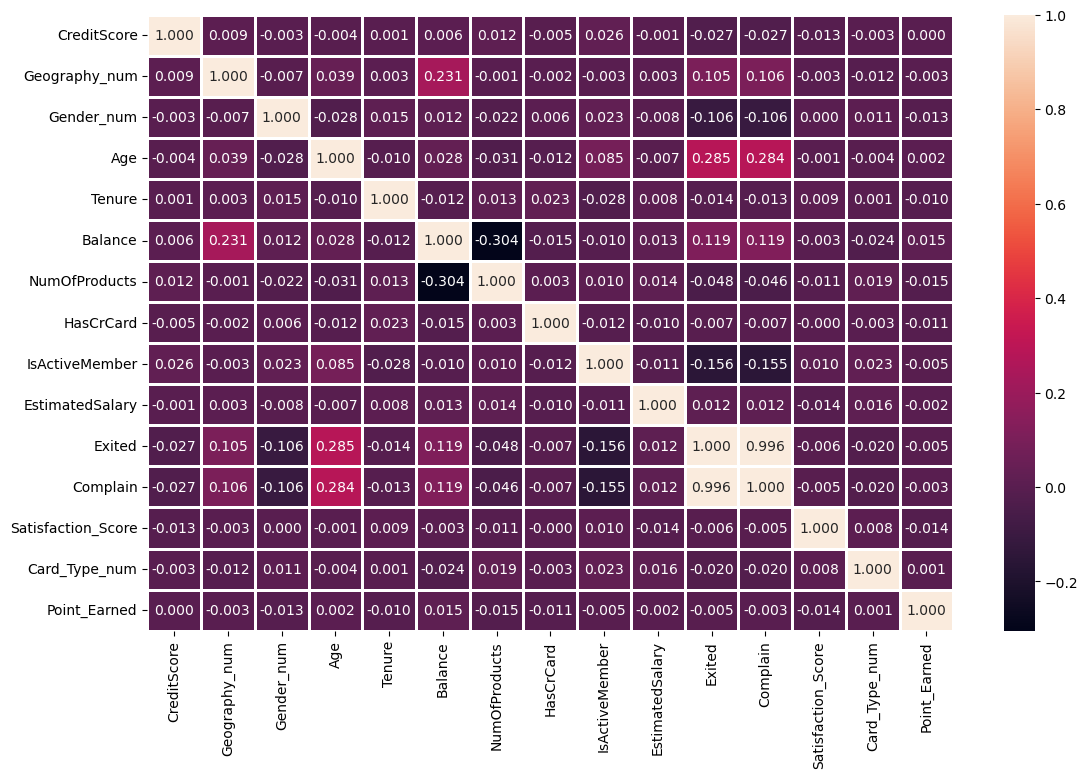

In [36]:
plt.figure(figsize = (13,8))
sns.heatmap(corr, annot = True, fmt = '.3f', linewidth = 1)

In [16]:
X = df[['CreditScore', 'Geography_num',
       'Gender_num', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction_Score', 'Card_Type_num', 'Point_Earned']]
Y=df.Exited

In [17]:
X = sm.add_constant(X) 
model = sm.OLS(Y, X) 
results = model.fit()  
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.897e+25
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:40:20   Log-Likelihood:             2.5817e+05
No. Observations:               10000   AIC:                        -5.163e+05
Df Residuals:                    9984   BIC:                        -5.162e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.182e-16   1.47

Данная модель объясняет на 100% изменчивость показателя Exited (ухода клиента из банка).

Одназначно, в наибольшей степени на уход клиента из банка влияет наличие жалобы у клиента. И исходя из результатов корреляционного анализа, оценка выставленная клиентом за разрешение его жалобы практически не имеет никакого влияния на удержание клиента в банке. Рассмотрим подробнее два этих элемента.


In [18]:
df_complain = df[['CustomerId','Exited','Complain','Satisfaction_Score']]
df_complain

,CustomerId,Exited,Complain,Satisfaction_Score
0,15634602,1,1,2
1,15647311,0,1,3
2,15619304,1,1,3
3,15701354,0,0,5
4,15737888,0,0,5
...,...,...,...,...
9995,15606229,0,0,1
9996,15569892,0,0,5
9997,15584532,1,1,3
9998,15682355,1,1,2


In [19]:
churn_counts = df.Exited.value_counts()
churn_counts

Exited
0    7962
1    2038
Name: count, dtype: int64

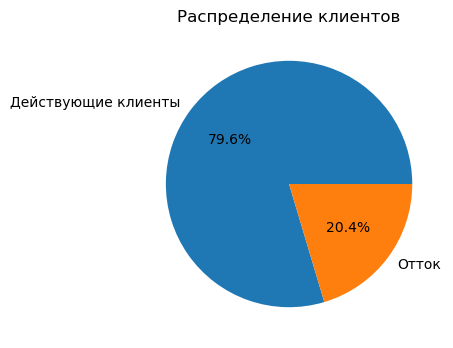

In [21]:
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=['Действующие клиенты', 'Отток'], autopct='%1.1f%%')
plt.title('Распределение клиентов')
plt.show()

In [22]:
df1 = df_complain.groupby('Exited', as_index = False).agg({'Complain':'sum', 'Exited':'count'})
df1

,Complain,Exited
0,10,7962
1,2034,2038


In [23]:
df2 = pd.crosstab(index= df_complain.Complain, columns = df_complain.Exited)
df2

Exited,0,1
Complain,,
0,7952,4
1,10,2034


In [391]:
2034/2038*100

99.80372914622178

In [392]:
10/7952*100

0.12575452716297786

20% клиентов покинули банк. У 99.8 % клиентов, покинувших банк, была жалоба. Только  4 клиента перестали обслуживаться в банке без предварительных жалоб. 
10 клиентов банка  продолжили обслуживание после жалобы.Т.е. только у 0.13% действующих клиентов банка были жалобы.

In [230]:
ex_without_complaints = df[(df['Exited'] == 1) & (df['Complain'] == 0)]
ex_without_complaints

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
138,139,15594408,Chia,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1,0,4,DIAMOND,814
144,145,15612350,Taylor,691,France,Female,31,5,40915.55,1,1,0,126213.84,1,0,2,SILVER,402
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,1,0,1,GOLD,354


In [231]:
not_ex_with_complaints = df[(df['Exited'] == 0) & (df['Complain'] == 1)]
not_ex_with_complaints

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
65,66,15789484,Hammond,751,Germany,Female,36,6,169831.46,2,1,1,27758.36,0,1,5,GOLD,379
66,67,15696061,Brownless,581,Germany,Female,34,1,101633.04,1,1,0,110431.51,0,1,3,PLATINUM,469
67,68,15641582,Chibugo,735,Germany,Male,43,10,123180.01,2,1,1,196673.28,0,1,3,PLATINUM,683
68,69,15638424,Glauert,661,Germany,Female,35,5,150725.53,2,0,1,113656.85,0,1,1,GOLD,770
171,172,15613172,Sun,628,Germany,Male,27,5,95826.49,2,1,0,155996.96,0,1,2,SILVER,818
173,174,15586310,Ting,578,France,Male,30,4,169462.09,1,1,0,112187.11,0,1,5,DIAMOND,872
9977,9978,15579969,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0,1,3,SILVER,862
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,1,3,GOLD,764
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0,1,5,PLATINUM,875


Никакой единой закономерности по данным клиентам не наблюдается, размер выборки очень мал, чтобы сделать анализ и какие-либо выводы

In [160]:
df.Satisfaction_Score.value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction_Score, dtype: int64

Исходя из корреляционной матрицы, в большей степени с показателем ухода, кроме наличия жалобы,связаны параметры Geography_num,'Gender_num', 'Age','Balance','IsActiveMember'. Наибольшая корреляционная зависимость у параметра Exited с Age. Исследуем данные показатели более подробно.


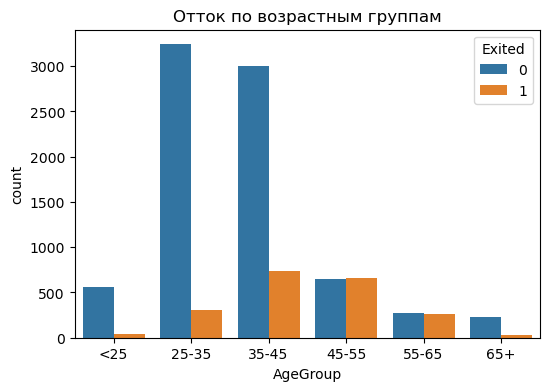

In [27]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, np.inf], 
labels=['<25', '25-35', '35-45', '45-55', '55-65','65+'])
plt.figure(figsize=(6, 4))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Отток по возрастным группам')
plt.show()

In [28]:
churn_rate_age = round(df.groupby('AgeGroup')['Exited'].mean()*100,1) 
churn_rate_age

AgeGroup
<25       7.5
25-35     8.5
35-45    19.6
45-55    50.6
55-65    48.3
65+      13.3
Name: Exited, dtype: float64

Больше всего уходят из банка клиенты в возрасте от 45 до 65 лет, порядка 50% клиентов данного возраста перестают пользоваться услугами банка. Напротив, самый низкий отток клиентов (около 8%) у клиентов в возрасте до 35 лет.

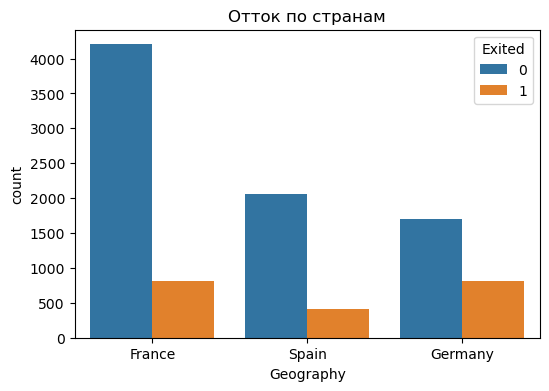

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Отток по странам')
plt.show()

In [302]:
churn_rate_geography = round(df.groupby('Geography')['Exited'].mean()*100,1)
churn_rate_geography

Geography
France     16.2
Germany    32.4
Spain      16.7
Name: Exited, dtype: float64

Наибольший отток клиентов наблюдается в Германии (32% ), что в два раза привышает отток в Испании и Франции.

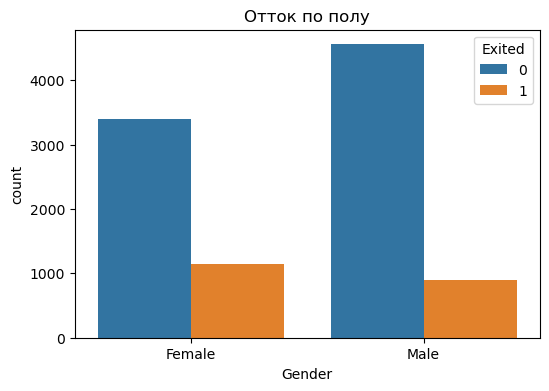

In [31]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Gender', hue = 'Exited', data = df)
plt.title('Отток по полу')
plt.show()

In [301]:
churn_rate_gender = round(df.groupby('Gender')['Exited'].mean()*100,1)
churn_rate_gender

Gender
Female    25.1
Male      16.5
Name: Exited, dtype: float64

Больший отток клиентов наблюдается среди женщин. 25% женщин покидают банк, среди мужчин отток клиентов на уровне 16%.

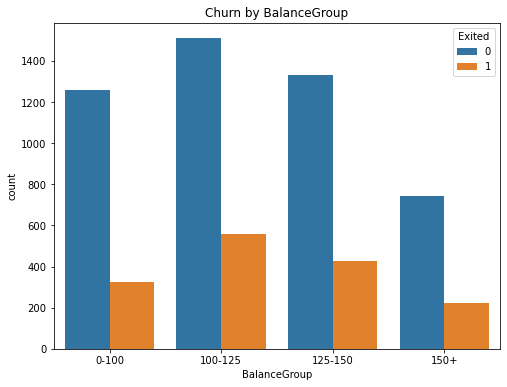

In [304]:
df['BalanceGroup'] = pd.cut(df['Balance'], bins=[0, 100000, 125000, 150000, np.inf],
labels=['0-100','100-125', '125-150', '150+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='BalanceGroup', hue='Exited', data=df)
plt.title('Churn by BalanceGroup')
plt.show()

In [305]:
churn_rate_balance = round(df.groupby('BalanceGroup')['Exited'].mean()*100,1)
churn_rate_balance

BalanceGroup
0-100      20.6
100-125    27.0
125-150    24.3
150+       23.1
Name: Exited, dtype: float64

In [ ]:
Исходя из данных, нельзя сделать вывод о том, что величина баланса клиента влияет на показатель оттока.

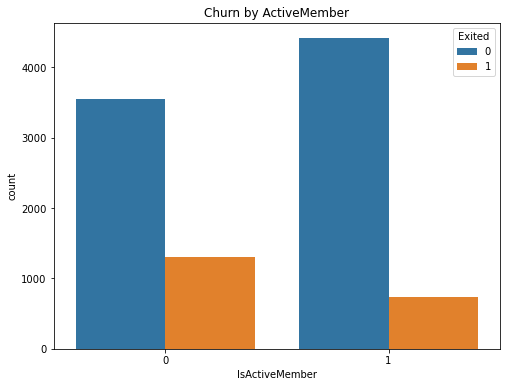

In [307]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited')
plt.title('Churn by ActiveMember')
plt.show()

In [308]:
churn_rate_activemember = round(df.groupby('IsActiveMember')['Exited'].mean()*100,1)
churn_rate_activemember

IsActiveMember
0    26.9
1    14.3
Name: Exited, dtype: float64

Одназначно больший отток наблюдается у неактивных клиентов, почти 27% против 14% у активных клиентов.

Так как 25 процентиль показателя Balance составляет ноль, можем с уверенностью сказать, что очень много клиентов имеет на балансе 0

In [326]:
df.query('Balance == 0').Balance.count() # это 36% от всего числа клиентов

3617

<AxesSubplot:>

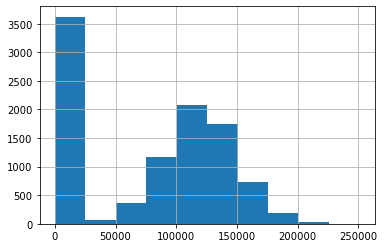

In [325]:
df.Balance.hist()    # Если убрать нулевые значения, то показатель Balance распределен нормально

In [363]:
# Клиенты с нулевым балансом, могут быть активными клиентами, нет закономерности нулевой баланс = неактивный клиент
df.query('Balance == 0').IsActiveMember.mean()

0.5178324578379873


#### Разделим всех клиентом на две группы, на клиентов с нулевым балансом и положительным и посмотрим, как это сказывается на оттоке


In [334]:
df.query('Balance == 0').Exited.mean()

0.13823610727121924

In [335]:
df.query('Balance > 0').Exited.mean()

0.2409525301582328

Изначально мое предположение о том, что клиенты с нулевым балансом более активно покидают банк, не оправдалось. 14% c нулевым балансом покинуло банк и 24% клиентов покинуло банк, чей баланс был больше 0.

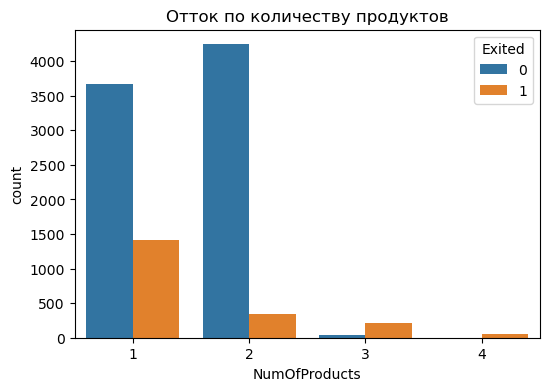

In [34]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df)
plt.title('Отток по количеству продуктов')
plt.show()

In [337]:

churn_rate_products = round(df.groupby('NumOfProducts')['Exited'].mean()*100,1)
churn_rate_products

NumOfProducts
1     27.7
2      7.6
3     82.7
4    100.0
Name: Exited, dtype: float64

In [342]:

df.NumOfProducts.value_counts(normalize=True)*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

Клиенты банков пользуются от 1 до 4-х банковских продуктов. Все 100% клиентов, у которых было 4 продукта, покинули банк (60 клиентов) и 83% c тремя продуктами (266 клиентов). Возможно, причина ухода клиентов имеено из-за общего продукта/ продуктов.
Очевидно, что клиенты с 1 продуктом уходят из банка значительно чаще (28% клиентов), чем те клиенты, которые пользуются двумя продуктами, их отток на уровне 8%.

Исходя из данных корреляционной матрицы, достаточно сильная связь наблюдается у показателей баланс и количество продуктов, которыми пользуется клиент. Проверим, как в совокупноости эти два фактора оказывают влияние на отток клиентов

In [39]:

churn_rate_balance_products = df.groupby(['Balance', 'NumOfProducts'])['Exited'].mean().reset_index()
fig = px.density_heatmap(churn_rate_balance_products, x='Balance', y='NumOfProducts',
                         z='Exited', title='Отток клиентов в зависимоти от Величины баланса и Кол-ва продуктов')
fig.update_layout(xaxis_title='Balance', yaxis_title='Number Of Products')
fig.show()

Как видно из выше представленной карты, наибольшее число клиентов, покинувших банк, пользовались только одним продуктом и их баланс составлял 95 - 145 тыс.

Интересно подробнее изучить клиентов с одним продуктом и балансом 95 -145 и понять
причину ухода именно этих клиентов.

In [353]:
target_group1 = df.query('Balance>= 95000 and Balance<=145000  and NumOfProducts ==1' )
target_group1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Geography_num,Gender_num,Card_Type_num,AgeGroup,BalanceGroup
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0,5,GOLD,425,1,0,1,35-45,not null
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,...,0,0,3,GOLD,342,0,1,1,25-35,not null
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,...,1,0,2,SILVER,163,1,1,1,55-65,not null
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,...,0,0,5,DIAMOND,236,1,1,0,35-45,not null
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,...,0,0,5,DIAMOND,499,1,0,0,35-45,not null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9972,15721377,Chou,833,France,Female,34,3,144751.81,1,...,0,0,3,SILVER,908,0,0,1,25-35,not null
9974,9975,15695474,Barker,583,France,Male,33,7,122531.86,1,...,0,0,1,SILVER,313,0,1,1,25-35,not null
9976,9977,15656062,Azikiwe,637,France,Female,33,7,103377.81,1,...,0,0,1,SILVER,449,0,0,1,25-35,not null
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,...,1,1,4,GOLD,591,1,0,1,45-55,not null


Группа таких клиентов составляет почти 26% от всей клиентской базы банка

In [413]:
target_group2 = df.query('((Balance < 95000 or Balance >145000)  and (NumOfProducts ==2 or NumOfProducts ==1)) or (Balance>= 95000 and Balance<=145000  and NumOfProducts ==2)' )
target_group2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Geography_num,Gender_num,Card_Type_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,1,2,DIAMOND,464,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,1,3,DIAMOND,456,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,0,5,GOLD,350,0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,...,0,149756.71,1,1,5,DIAMOND,484,1,1,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,...,1,10062.80,0,0,2,SILVER,206,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,...,0,167773.55,0,0,4,PLATINUM,311,0,0,1
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,0,96270.64,0,0,1,DIAMOND,300,0,1,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,1,101699.77,0,0,5,PLATINUM,771,0,1,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,1,42085.58,1,1,3,SILVER,564,0,0,1


In [359]:
target_group1.Exited.mean()

0.2735009671179884

In [414]:
target_group2.Exited.mean()

0.14825786429679785

Еще более точно подтвердили то, что клиенты, которые пользуются только одним продуктом,  и баланс которых составляет величину от 95 тыс до 145 тыс наиболее подвержены риску уйти из банка (27%), чем клиенты, пользующиеся двумя продуктами и имеющими баланс менее 95 тыс или больше 145 (15%).

In [393]:
target_group1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Geography_num,Gender_num,Card_Type_num
count,2585.000000,2.585000e+03,2585.000000,2585.000000,2585.000000,2585.000000,2585.0,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000
mean,4992.168279,1.568870e+07,650.447195,39.510638,4.982979,119590.528383,1.0,0.697872,0.499807,99895.936770,0.273501,0.273501,2.990329,609.270019,0.571373,0.552805,0.730368
std,2885.974080,7.144557e+04,97.071355,10.667722,2.930256,13821.701670,0.0,0.459269,0.500097,57736.590813,0.445842,0.445842,1.414044,224.263516,0.494975,0.497300,0.443855
min,5.000000,1.556580e+07,350.000000,18.000000,0.000000,95001.330000,1.0,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,163.000000,0.000000,0.000000,0.000000
25%,2493.000000,1.562803e+07,581.000000,32.000000,2.000000,107949.450000,1.0,0.000000,0.000000,50595.150000,0.000000,0.000000,2.000000,416.000000,0.000000,0.000000,0.000000
50%,4981.000000,1.568661e+07,651.000000,38.000000,5.000000,119655.770000,1.0,1.000000,0.000000,99504.030000,0.000000,0.000000,3.000000,609.000000,1.000000,1.000000,1.000000
75%,7474.000000,1.575064e+07,719.000000,45.000000,8.000000,131033.760000,1.0,1.000000,1.000000,149073.880000,1.000000,1.000000,4.000000,801.000000,1.000000,1.000000,1.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,144976.500000,1.0,1.000000,1.000000,199970.740000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000


In [396]:
target_group1.Geography.value_counts()

France     1108
Germany     941
Spain       536
Name: Geography, dtype: int64

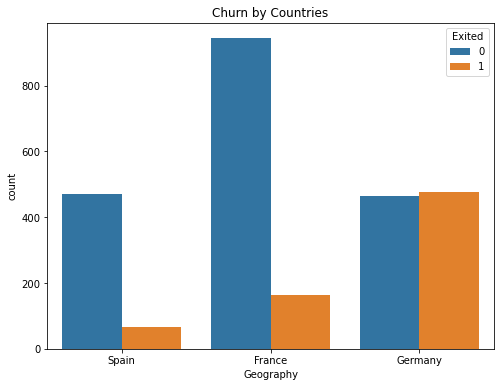

In [364]:
#Сравнивая средние двух датасетов на первый взгляд видны отличия средних по георафическому принципу. Проверим.

plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=target_group1)
plt.title('Churn by Countries')
plt.show()

In [397]:
churn_rate_geography_target1 = round(target_group1.groupby('Geography')['Exited'].mean()*100,1)
churn_rate_geography_target1

Geography
France     14.8
Germany    50.6
Spain      12.5
Name: Exited, dtype: float64

Большую часть данной целевой группы составляют клиенты банка во Франции, но, очевидно, что самый большой отток клиентов данного целевого сегмента наблюдается в Германии. Отток в Германии составляет почти 51%. Во Франции 15% в Испании 13%, что находится в пределах нормы. 

In [398]:
target_group_germany = target_group1.query('Geography == "Germany"')
target_group_germany.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Geography_num,Gender_num,Card_Type_num
count,941.000000,9.410000e+02,941.000000,941.000000,941.000000,941.00000,941.0,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.0,941.000000,941.000000
mean,5083.314559,1.569020e+07,650.442083,41.065887,4.929862,119434.41475,1.0,0.703507,0.455898,101257.825069,0.505845,0.505845,2.963868,611.211477,1.0,0.507970,0.714134
std,2903.426232,7.356457e+04,98.290744,10.790949,2.932099,13513.51783,0.0,0.456954,0.498316,59170.001330,0.500232,0.500232,1.417509,224.478727,0.0,0.500202,0.452066
min,17.000000,1.556580e+07,365.000000,18.000000,0.000000,95001.33000,1.0,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,163.000000,1.0,0.000000,0.000000
25%,2580.000000,1.562723e+07,580.000000,33.000000,2.000000,108235.91000,1.0,0.000000,0.000000,49133.450000,0.000000,0.000000,2.000000,417.000000,1.0,0.000000,0.000000
50%,5057.000000,1.568807e+07,648.000000,40.000000,5.000000,119327.93000,1.0,1.000000,0.000000,102428.510000,1.000000,1.000000,3.000000,615.000000,1.0,1.000000,1.000000
75%,7684.000000,1.575661e+07,722.000000,48.000000,7.000000,130240.33000,1.0,1.000000,1.000000,152541.890000,1.000000,1.000000,4.000000,801.000000,1.0,1.000000,1.000000
max,9983.000000,1.581566e+07,850.000000,83.000000,10.000000,144962.74000,1.0,1.000000,1.000000,199970.740000,1.000000,1.000000,5.000000,1000.000000,1.0,1.000000,1.000000


/var/folders/8k/f5hf003n7s36d0r9h8kldlqr0000gn/T/ipykernel_8601/1501149696.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



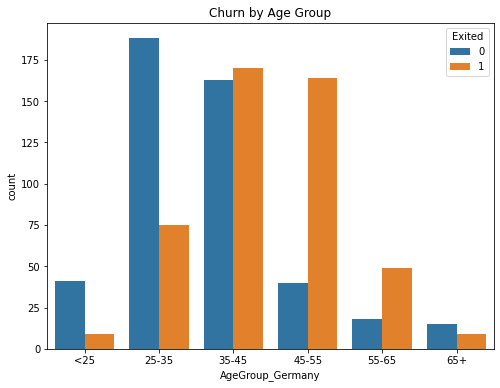

In [416]:
target_group_germany['AgeGroup_Germany'] = pd.cut(target_group_germany['Age'], bins=[0, 25, 35, 45, 55, 65, np.inf], 
labels=['<25', '25-35', '35-45', '45-55', '55-65','65+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup_Germany', hue='Exited', data=target_group_germany)
plt.title('Churn by Age Group')
plt.show()

In [417]:
churn_rate_age_germany = round(target_group_germany.groupby('AgeGroup_Germany')['Exited'].mean()*100,1) 
churn_rate_age_germany

AgeGroup_Germany
<25      18.0
25-35    28.5
35-45    51.1
45-55    80.4
55-65    73.1
65+      37.5
Name: Exited, dtype: float64


!ключевой группой клиентов, с которой банку необходимо будет наладить работу являются клиенты банка в Германии, которые пользуются только одним продуктом и баланс которых составляет от 95 до 145 тыс. Особое внимание уделить клиентам в возрасте 45-65 лет, именно в этой возрастной группе наблюдается аномально высокий уровень оттока. 


## Выводы

1. Основная причина оттока клиентов в банке - жалоба. При наличии жалобы клиент в 99,8% покидает банк.
   Решение: 
   - необходимо, со всеми сотрудники банка, которые работают с клиентами, провести  обучение по урегулированию конфликтов, клиентоориентированности. Периодический контроль знаний. Разбор ситуаций, которые спровоцировали конфликт;
   - незамедлительный контакт с клиентом после жалобы  отделом заботы о клиентах, переговоры, с целью уладить конфликт и предотвратиь уход клиента;
   - качественное обучение сотрудников при приеме на работу, так как зачастую жалобы случаются из-за ошибок специалиста банка. Контроля знаний.
2. Больше всего уходят из банка клиенты в возрасте от 45 до 65 лет, порядка 50% клиентов данного возраста перестают пользоваться услугами банка.
   Решение:
   - определить причины ухода из банка клиентов данной возрастной категории;
   - исходя из выявленных причин разработать продукт/программу лояльности для данной категории клиентов;
3. Наибольший отток клиентов наблюдается в банках  Германии (32% клиентов), что в два раза привышает отток в Испании и Франции.
   Решение:
   - определить причины жалоб клиентов, сравнить причины в разрезе стран, выявить различия;
   - устранить причины жалоб.
4. Больший отток клиентов наблюдается среди женщин. 25% женщин покидают банк, среди мужчин отток клиентов на уровне 16%.
5. Одназначно, больший отток наблюдается у неактивных клиентов, почти 27% против 14% у активных клиентов.
   Решение:
   - контактная политика;
   - информирование клиента о новых продуктах банка, акциях, программах лояльности (рассылка, уведомления, звонки)
   - переговоры по возобновлению сотрудничества  с неактивными клиентами.
6. Клиенты банков пользуются от 1 до 4-х банковских продуктов. Все 100% клиентов, у которых было 4 продукта, покинули банк (60 клиентов) и 83% c тремя продуктами (266 клиентов). Очевидно, что клиенты с 1 продуктом уходят из банка значительно чаще (28% клиентов), чем те клиенты, которые пользуются двумя продуктами, их отток на уровне 8%.
   Решение:
   - определить общий продукт у клиентов, которые пользовались 4 и 3-мя продуктами и покинули банк. Возможно, причина ухода клиентов имеено из-за этого продукта/ продуктов. Выявить недостатки данных продуктов, доработать. 
   - повышение продуктового проникновения путем информирование клиента о новых продуктах банка;
   - кросс-сейл при каждом контакте с клиентом
7. В ходе исследования выявлено, что клиенты, которые пользуются только одним продуктом, и баланс которых составляет  от 95 тыс до 145 тыс наиболее подвержены риску уйти из банка (27%), чем клиенты, пользующиеся двумя продуктами и имеющими баланс менее 95 тыс или больше 145 (15%).
   - определить причины ухода из банка клиентов данной группы;
   - исходя из выявленных причин разработать продукт/программу лояльности/ акцию для данной категории клиентов;
8. Изучая данные еще глубже, выявили ключевую группу клиентов, с которой банку необходимо наладить работу в самые кратчие сроки, так как там наблюдается анамольно высокий отток клиентов (больше 73%). Клиенты банка в Германии, которые пользуются только одним продуктом и баланс которых составляет от 95 до 145 тыс в возрасте от 45 до 65 лет.
   